In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import log_loss,accuracy_score
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

In [2]:
concrete=pd.read_csv('Concrete_Data.csv')
X =concrete.drop('Strength',axis=1)
y =concrete['Strength']

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [4]:
dtr=DecisionTreeRegressor(random_state=23,max_depth=4) 
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=23)

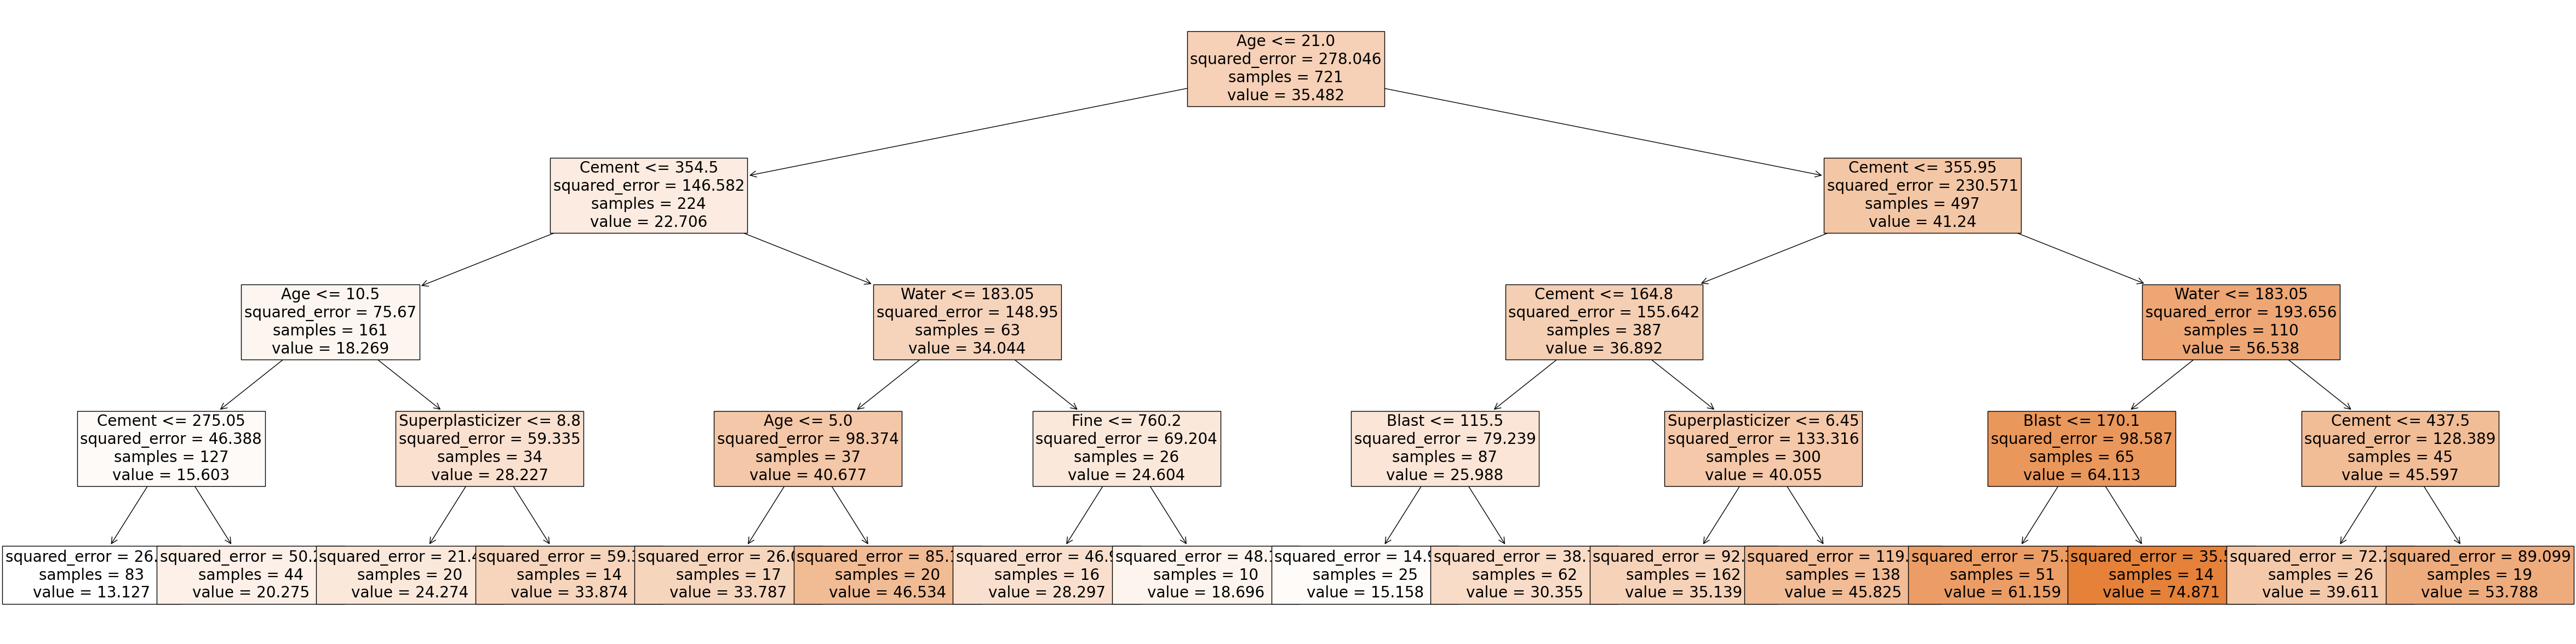

In [5]:
#Creating a graphical representation of Tree
plt.figure(figsize=(60,15))
plot_tree(dtr,feature_names=X_train.columns, filled=True,fontsize=20)
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[2,3,4,5,6,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,3,5,7,10,15]}
gcv=GridSearchCV(dtr,param_grid=params,cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8423769153142352


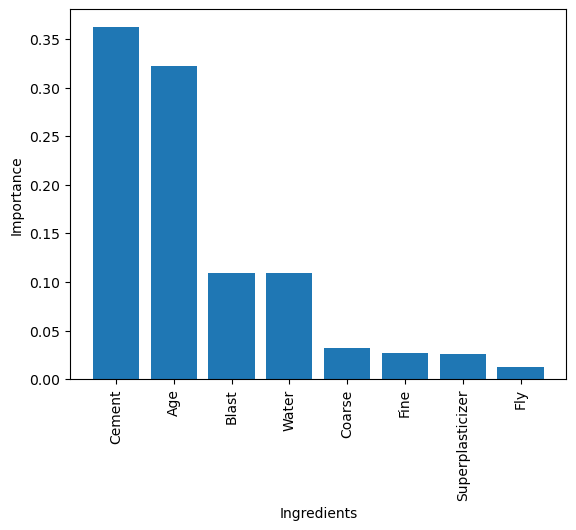

In [7]:
best_model=gcv.best_estimator_
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_,'importance':best_model.feature_importances_})
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by='importance',ascending=False)
plt.bar(df_imp['variable'],df_imp['importance'])
plt.ylabel("Importance")
plt.xlabel("Ingredients")
plt.xticks(rotation=90)
plt.show()